In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import rotunno as rt
import mpmath

In [2]:
def calc_G_p(X, Z, k, M, A, zp):
    
    G = np.zeros(Z.shape).astype(complex)
        
    zp_ind = np.argmin(np.abs(zp-Z[:,0]))
    
    m_sig = np.sqrt((M/A)**2+1)*k/A
    m_p = k/A*M/A+m_sig
    m_n = k/A*M/A-m_sig
    
    G[0:zp_ind, :] = -1/m_sig*np.exp(M/A*k/A*1j*Z[0:zp_ind, :])
    G[0:zp_ind, :] *= np.sin(m_sig*Z[0:zp_ind, :])
    G[0:zp_ind, :] *= np.exp(-1j*m_n*zp)

    G[zp_ind:, :] = -1/m_sig*np.exp(-M/A*k/A*1j*zp)
    G[zp_ind:, :] *= np.sin(m_sig*zp)
    G[zp_ind:, :] *= np.exp(1j*m_p*Z[zp_ind:, :])
        
    return G
        
def calc_G_n(X, Z, k, M, A, zp):
    
    G = np.zeros(Z.shape).astype(complex)
        
    zp_ind = np.argmin(np.abs(zp-Z[:,0]))
    
    m_sig = np.sqrt((M/A)**2+1)*k/A
    m_p = k/A*M/A+m_sig
    m_n = k/A*M/A-m_sig
    
    G[0:zp_ind, :] = -1/m_sig*np.exp(M/A*k/A*1j*Z[0:zp_ind, :])
    G[0:zp_ind, :] *= np.sin(m_sig*Z[0:zp_ind, :])
    G[0:zp_ind, :] *= np.exp(-1j*m_p*zp)

    G[zp_ind:, :] = -1/m_sig*np.exp(-M/A*k/A*1j*zp)
    G[zp_ind:, :] *= np.sin(m_sig*zp)
    G[zp_ind:, :] *= np.exp(1j*m_n*Z[zp_ind:, :])
        
    return G
        

In [3]:
def plot_G(fig, axes, X, Z, G, A, M, zp, title='', dl=None):
    
    rt.init_fonts()
    
    if dl is None:
        dl = .05
    scale = 1/(2*dl)
    G_max = np.max(np.ceil(np.abs(np.real(G[:])*scale)))/scale

    levels = np.arange(-G_max, G_max+dl, dl)
    
    con = axes.contourf(X, Z+M*X, np.real(G), cmap='RdBu_r', levels=levels)

    axes.set_xlim([-1, 1])
    axes.set_ylim([0, 2])
    axes.set_aspect('equal')

    axes.plot([-1, 1], [zp-M, zp+M], linestyle='dashed', color='grey')
    axes.fill_between([-1, 1], [-M, +M], color='lightgrey')

    cbar = plt.colorbar(con, ax=axes)
    cbar.set_ticks(levels[::2])
    cbar.set_label(r'$\psi$ [-]')
    cbar.update_ticks()

    axes.set_xlabel(r'$x$ [-]')
    axes.set_ylabel(r'$z$ [-]')
    axes.set_yticks(np.arange(0, 2.5, .5))
    axes.set_yticks(np.arange(0, 2.25, .25), minor=True)
    axes.set_title(title)

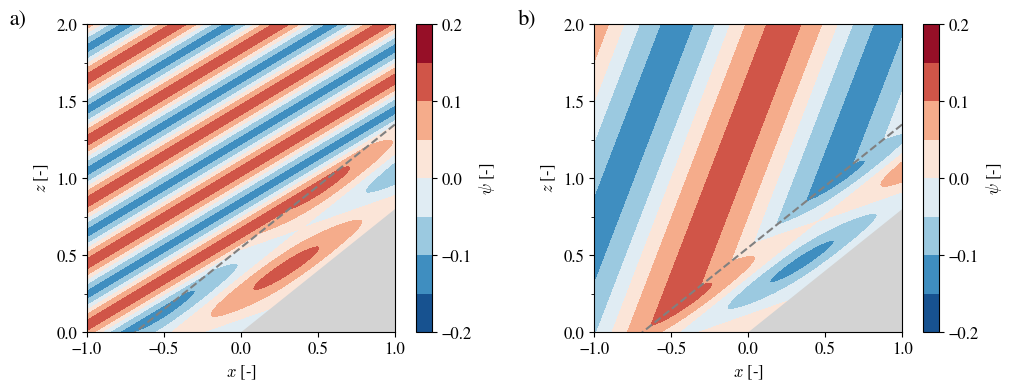

In [14]:
z = np.arange(0, 5, 1e-3)
x = np.arange(-1, 1, 1e-3)
X, Z = np.meshgrid(x, z)

k = np.pi
M = .8
A = np.sqrt(1 - M**2)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

zp = .55
G = calc_G_p(X, Z, k, M, A, zp)
G *= np.exp(1j*k*X)

plot_G(fig, axes[0], X, Z, G, A, M, zp, title='', dl=None)

G = calc_G_n(X, Z, k, M, A, zp)
G *= np.exp(1j*k*X)

plot_G(fig, axes[1], X, Z, G, A, M, zp, title='', dl=None)
    
rt.make_subplot_labels(axes=axes.flatten(), x_shift=-.25)

plt.savefig(
    '/home/ewan/Documents/rotunno83/pwc_G_CJ.png', 
    dpi=200, bbox_inches='tight', facecolor='white')

# Explore Fourier Transform of Triangular Pulse

In [66]:
x = np.linspace(-5, 5, 1000)
k = np.linspace(0, 30, 100000)[1:]

sigma = np.zeros_like(x)
for i in range(len(x)):
    sigma[i] = np.trapz(2/(k**2)*(1-np.cos(k))*np.cos(k*x[i]), k)

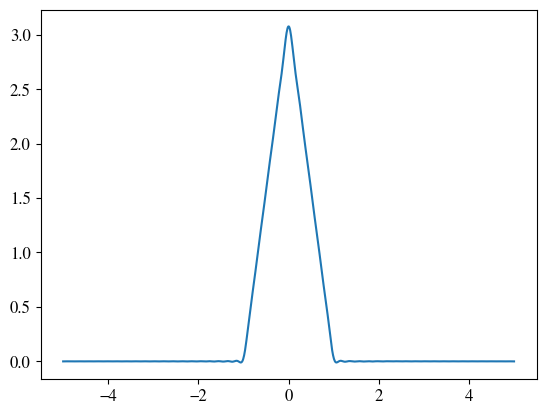

In [67]:
plt.plot(x, sigma)